### Exercise 1

**1.** 
We use the generalized inverse method :

$$F_X(x_k) = \mathbb{P}(X \leq x_k) = \sum_{i=1}^k P(X = x_i) = \sum_{i=1}^k p_i$$

$$U = F_X(k) \iff X = F^{-1}_X(u)$$

Here we have :

$$F^{-1}_X(u) = \inf \{x \in \{x_1, ..., x_n\} st. F_X(x) \geq u\}$$
$$= \left\{ 
        \begin{array}{lll}
            x_1 & if & u \leq p_1 \\
            x_2 & if & p_1 < u \leq p_1 + p_2 \\
            ... & & \\
            x_n & if & \sum_{i=1}^{n-1} p_{i} < u \leq \sum_{i=1}^{n} p_{i}
        \end{array}
    \right.$$
$$= \left\{ 
        \begin{array}{lll}
            x_1 & if & u \leq p_1 \\
            x_k & if & \sum_{i=1}^{k-1} p_{i} < u \leq \sum_{i=1}^{k} p_{i}
        \end{array}
    \right.$$

**2.**

In [55]:
import numpy as np

def generalized_inverse_method(probabilities, realizations, n):
    
    U = np.random.uniform(size=n)
    X = []
    
    for u in U :
    
        if u <= probabilities[0]:
            X.append( realizations[0] )

        else:
            for i in range(1, len(probabilities)+1):
                if np.sum(probabilities[:i]) < u and u <= np.sum(probabilities[:i+1]) :
                    X.append( realizations[i] )
    return X    

**3.**

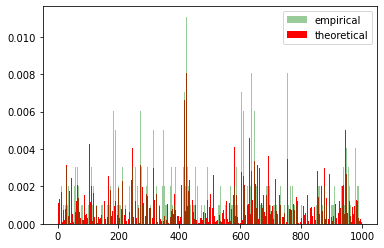

In [62]:
n = 1000
from matplotlib import pyplot as plt
probabilities = np.random.dirichlet(np.ones(n), size=1)[0]
realizations = np.arange(1,n+1)
empirical = generalized_inverse_method(probabilities, realizations, n)
plt.bar(realizations, probabilities, label="theoretical", color="r", alpha=1)
plt.hist(empirical, label="empirical",density=True,color="g", alpha=.4, bins=n-1)
plt.legend()

### Exercise 2

**1.**

$$L(x ; \alpha, \mu, \Sigma) = \prod_{i=1}^n f_{\alpha, \mu, \Sigma}(x_i)$$
$$= \prod_{i=1}^n \sum_{k=1}^m f_{\alpha, \mu, \Sigma}(x_i, z_i=k)$$
$$= \prod_{i=1}^n \sum_{k=1}^m f_{\alpha, \mu, \Sigma}(x_i| z_i=k) f_{\alpha, \mu, \Sigma}(z_i=k)$$
$$= \prod_{i=1}^n \sum_{k=1}^m \mathcal{N}(x_i ; \mu_k, \Sigma_k) \: \alpha_k$$

Then,
$$log L(x ; \alpha, \mu, \Sigma) = \sum_{i=1}^n log \left( \sum_{k=1}^m \mathcal{N}(x_i ; \mu_k, \Sigma_k) \: \alpha_k \right)$$

Let's find the MLE for the mean :

$$\nabla_{\mu_l} log L(x ; \alpha, \mu, \Sigma) = \sum_{i=1}^n \frac{\alpha_l \Sigma_l^{-1} (x_i - \mu_l) \mathcal{N}(x_i ; \mu_l, \Sigma_l)}{\sum_{k=1}^m \mathcal{N}(x_i ; \mu_k, \Sigma_k) \: \alpha_k}$$

$$\nabla_{\mu_l} log L(x ; \alpha, \mu, \Sigma) = 0 \iff \sum_{i=1}^n \frac{\alpha_l \Sigma_l^{-1} (x_i - \mu_l) \mathcal{N}(x_i ; \mu_l, \Sigma_l)}{\sum_{k=1}^m \mathcal{N}(x_i ; \mu_k, \Sigma_k) \: \alpha_k} = 0$$

We remark that $\mathbb{P}(Z_i = l | X_i) =  \frac{\mathbb{P}(X_i | Z_i = l) \mathbb{P}(Z_i = l)}{\mathbb{P}(X_i)} = \frac{\mathcal{N}(x_i ; \mu_l, \Sigma_l) \: \alpha_l}{\sum_{l=1}^m \mathcal{N}(x_i ; \mu_l, \Sigma_l) \: \alpha_l}$

Coming back to the previous derivations we get :

$$\sum_{i=1}^n \frac{\alpha_l \Sigma_l^{-1} (x_i - \mu_l) \mathcal{N}(x_i ; \mu_l, \Sigma_l)}{\sum_{l=1}^m \mathcal{N}(x_i ; \mu_l, \Sigma_l) \: \alpha_l} = 0$$

$$\iff \sum_{i=1}^n \Sigma_l^{-1} (x_i - \mu_l) \mathbb{P}(Z_i = l | X_i) = 0$$

$$\iff \sum_{i=1}^n \Sigma_l^{-1} \mu_l \mathbb{P}(Z_i = l | X_i) = \sum_{i=1}^n \Sigma_l^{-1} x_i \mathbb{P}(Z_i = l | X_i)$$

$$\iff \mu_l = \frac{ \sum_{i=1}^n x_i \mathbb{P}(Z_i = l | X_i) }{ \sum_{i=1}^n \mathbb{P}(Z_i = l | X_i) }$$

$$\iff \mu_l = \frac{ \sum_{i=1}^n x_i \mathbb{P}(Z_i = l | X_i) }{ n_l }$$

Let's find the MLE for the covariance :

$$\nabla_{\Sigma_l} log L(x ; \alpha, \mu, \Sigma) = \sum_{i=1}^n \frac{ - \alpha_l \frac{1}{2} \Sigma^{-1} \mathcal{N}(x_i ; \mu_l, \Sigma_l) - \alpha_l \Sigma^{-1} (x_i - \mu_l) (x_l - \mu_l)^T \Sigma^{-1} \mathcal{N}(x_i ; \mu_l, \Sigma_l)}{\sum_{l=1}^m \mathcal{N}(x_i ; \mu_l, \Sigma_l) \: \alpha_l}$$

$$\nabla_{\Sigma_l} log L(x ; \alpha, \mu, \Sigma) = 0$$

$$\iff \sum_{i=1}^n \alpha_l \mathcal{N}(x_i ; \mu_l, \Sigma_l) \frac{ - \frac{1}{2} \Sigma^{-1} - \Sigma^{-1} (x_i - \mu_l) (x_i - \mu_l)^T \Sigma^{-1}}{\sum_{l=1}^m \mathcal{N}(x_i ; \mu_l, \Sigma_l) \: \alpha_l} = 0$$

$$\iff \sum_{i=1}^n \mathbb{P}(Z_i = l | X_i) ( - \frac{1}{2} \Sigma^{-1} - \Sigma^{-1} (x_i - \mu_l) (x_i - \mu_l)^T \Sigma^{-1} ) = 0$$

$$\iff - \frac{1}{2} \sum_{i=1}^n \mathbb{P}(Z_i = l | X_i) \Sigma^{-1} = \sum_{i=1}^n \mathbb{P}(Z_i = l | X_i) \Sigma^{-1} (x_i - \mu_l) (x_i - \mu_l)^T \Sigma^{-1}$$

$$\iff - \frac{1}{2} \sum_{i=1}^n \mathbb{P}(Z_i = l | X_i) = \sum_{i=1}^n \mathbb{P}(Z_i = l | X_i) \Sigma^{-1} (x_i - \mu_l) (x_i - \mu_l)^T$$

TO DO







$$\iff \sum_{i=1}^n \frac{ - \alpha_l \frac{1}{2} \Sigma^{-1} \mathcal{N}(x_i ; \mu_l, \Sigma_l) - \alpha_l \Sigma^{-1} (x_i - \mu_l) (x_i - \mu_l)^T \Sigma^{-1} \mathcal{N}(x_i ; \mu_l, \Sigma_l)}{\sum_{l=1}^m \mathcal{N}(x_i ; \mu_l, \Sigma_l) \: \alpha_l} = 0$$

$$\nabla_{\Sigma_l} log L(x ; \alpha, \mu, \Sigma) = 0 \iff \sum_{i=1}^n \frac{\alpha_l \Sigma_l^{-1} (x_i - \mu_l) \mathcal{N}(x_i ; \mu_l, \Sigma_l)}{\sum_{k=1}^m \mathcal{N}(x_i ; \mu_k, \Sigma_k) \: \alpha_k} = 0$$

$$\nabla_{\Sigma} l(x | \pi, \mu_l, \Sigma) = \sum_{l=1}^n \nabla_{\Sigma} \left( - \frac{1}{2} log(| \Sigma |) \right) + \nabla_{\Sigma} \left( - \frac{1}{2} (x_l - \mu_{y_l})^T \Sigma^{-1} (x_l - \mu_{y_l}) \right)$$

Using that the gradient of the determinant is equal to the comatrix we have 
$\nabla_{\Sigma} log(|\Sigma|) = \frac{\nabla_{\Sigma} |\Sigma|}{|\Sigma|} = \frac{com \: \Sigma}{|\Sigma|} = \frac{com \: \Sigma^T}{|\Sigma|} = \Sigma^{-1}$. Also we use that $\nabla_X a^T X^{-1} b = - X^{-1} a b^T X^{-1}$ and we get :

$$\nabla_{\Sigma} l(x | \pi, \mu_l, \Sigma) = \sum_{l=1}^n - \frac{1}{2} \Sigma^{-1} + \frac{1}{2} \Sigma^{-1} (x_l - \mu_{y_l}) (x_l - \mu_{y_l})^T \Sigma^{-1}$$

$$= - \frac{n}{2} \Sigma^{-1} + \frac{1}{2} \Sigma^{-1} \sum_{l=1}^n \left( (x_l - \mu_{y_l}) (x_l - \mu_{y_l})^T \right) \Sigma^{-1}$$

$$\nabla_{\Sigma} l(x | \pi, \mu_l, \Sigma) = 0 \iff - \frac{n}{2} \Sigma^{-1} + \frac{1}{2} \Sigma^{-1} \sum_{l=1}^n \left( (x_l - \mu_{y_l}) (x_l - \mu_{y_l})^T \right) \Sigma^{-1} = 0$$

$$\iff - \frac{n}{2} + \frac{1}{2} \Sigma^{-1} \sum_{l=1}^n (x_l - \mu_{y_l}) (x_l - \mu_{y_l})^T = 0$$

$$\iff - \frac{n}{2} \Sigma + \frac{1}{2} \sum_{l=1}^n (x_l - \mu_{y_l}) (x_l - \mu_{y_l})^T = 0$$

(Multiplying $\Sigma$ on the right and then on the left).

$$\iff \frac{1}{2} \sum_{l=1}^n (x_l - \mu_{y_l}) (x_l - \mu_{y_l})^T = \frac{n}{2} \Sigma$$

$$\iff \Sigma = \frac{1}{n} \sum_{l=1}^n (x_l - \mu_{y_l}) (x_l - \mu_{y_l})^T$$

**2.**

**3.**

**4.**

**5**

**6**

### Exercise 3

**1.**
Gradient descent methods iteratively update a set of parameters in order to optimize a function. The classical gradient descent algorithm do so by looking at all points in the space and updates the gradient for all points whereas the stochastic gradient descent randomly choose points in the space and update the gradient for each of these points. This is a really good alternative to the classical algorithm in high dimension because the algorithm makes as many updates as it chooses a new point in the space. The convergence is often faster.

In [1]:
def stochasticGradientDescent(labels, points, w0, N = 5000):
    
    tolerence = 10**(-5)
    
    w = w0
    ortogonal_w = np.array([w[1], -w[0]])
    
    gradient = np.array(2 * ( points.dot(w.transpose()) - labels ).dot(points)).dot(ortogonal_w) * ortogonal_w
        
    lnormeg = [np.linalg.norm(gradient.dot(w.transpose()))]
    
    n=1
    
    while np.linalg.norm(gradient.dot(ortogonal_w)) > tolerence and n < N:
        
        w = w - gradient/n
        w = w / np.linalg.norm(w)
        
        ortogonal_w = np.array([w[1], -w[0]])
        
        gradient = np.array(2 * ( points.dot(w.transpose()) - labels ).dot(points)).dot(ortogonal_w) * ortogonal_w
        
        lnormeg.append(np.linalg.norm(gradient.dot(w.transpose())))
        
        n += 1
        
    if n==N:
        
        print(f"Max number of iterations {N}")
        
    return w, np.array(lnormeg)

**2.**

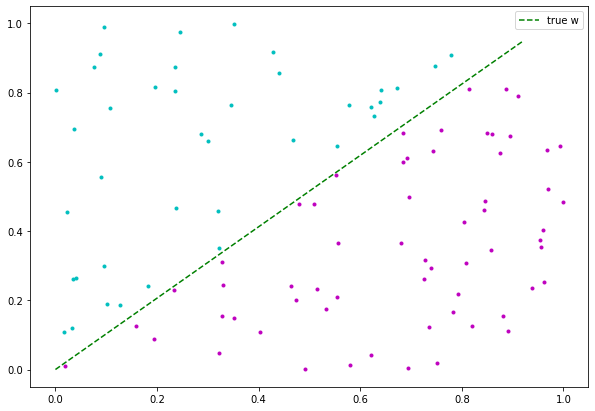

In [8]:
import numpy as np
from matplotlib import pyplot as plt

n = 100

true_w = np.random.rand(2)
w0 = np.random.rand(2)
points = np.random.rand(n,2)
labels = 1*np.sign( points.dot(np.array([true_w[1], - true_w[0]])) )

plt.figure(figsize=(10,7))
plt.plot(points[labels==-1][:,0],points[labels==-1][:,1], ".c")
plt.plot(points[labels==1][:,0],points[labels==1][:,1], ".m")
plt.plot([0,true_w[0]],[0,true_w[1]],"--g", label="true w")
plt.legend()

**3.**

In [9]:
w_final, list_of_norms = stochasticGradientDescent(labels, points, w0)

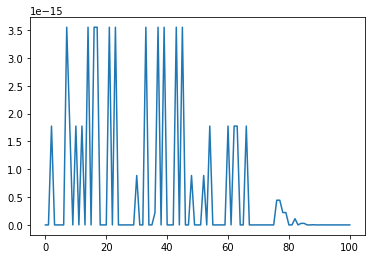

In [10]:
plt.plot(list_of_norms)

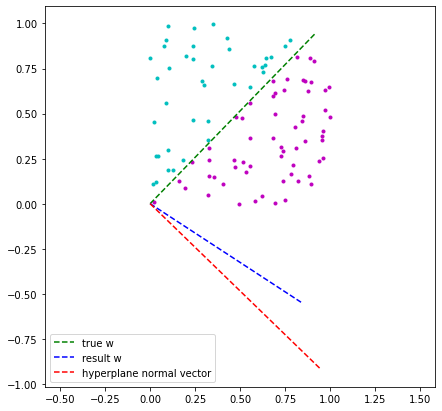

In [11]:
plt.figure(figsize=(7,7))
plt.axis("equal")
plt.plot(points[labels==-1][:,0],points[labels==-1][:,1], ".c")
plt.plot(points[labels==1][:,0],points[labels==1][:,1], ".m")
plt.plot([0,true_w[0]],[0,true_w[1]],"--g", label="true w")
plt.plot([0,w_final[0]],[0,w_final[1]],"--b", label="result w")
plt.plot([0,true_w[1]],[0,-true_w[0]],"--r", label="hyperplane normal vector")
plt.legend()

The result is not so far from the normal vector so that the algorithm is quite correct.
Indeed, when classifying the points in a class, the normal vector is the one that well define a criterion to base the binary classification on.

**4.**

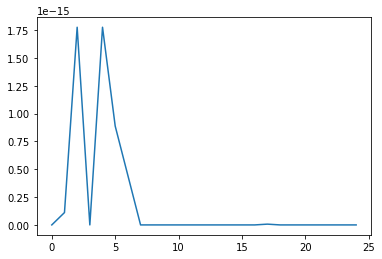

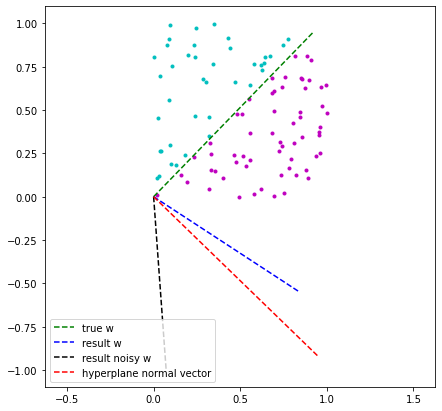

In [12]:
noisy_points = np.random.normal(0,1,points.shape)

w_final_noisy, list_of_norms = stochasticGradientDescent(labels, noisy_points, w0)

plt.plot(list_of_norms)

plt.figure(figsize=(7,7))
plt.axis("equal")
plt.plot(points[labels==-1][:,0],points[labels==-1][:,1], ".c")
plt.plot(points[labels==1][:,0],points[labels==1][:,1], ".m")
plt.plot([0,true_w[0]],[0,true_w[1]],"--g", label="true w")
plt.plot([0,w_final[0]],[0,w_final[1]],"--b", label="result w")
plt.plot([0,w_final_noisy[0]],[0,w_final_noisy[1]],"--k", label="result noisy w")
plt.plot([0,true_w[1]],[0,-true_w[0]],"--r", label="hyperplane normal vector")
plt.legend()

Results are good also with noise. Again we end with a vector quite similar to the normal one.

**5.**

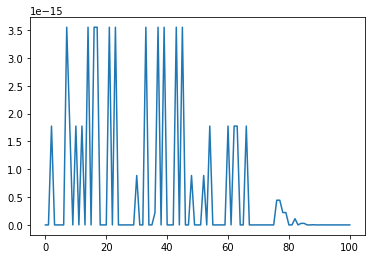

In [13]:
import pandas as pds

dataset = pds.read_csv("breast-cancer-wisconsin.data", header=None)

w_final, list_of_norms = stochasticGradientDescent(labels, points, w0)

plt.plot(list_of_norms)